In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [2]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [3]:
df.shape

(29922, 6)

In [4]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [5]:
#An object is a string in pandas so it performs a string operation instead of a mathematical one.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29922 entries, 0 to 29921
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    29922 non-null  int64 
 1   name        28434 non-null  object
 2   ordered_at  29922 non-null  object
 3   price       29922 non-null  object
 4   quantity    29922 non-null  int64 
 5   line_total  29922 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.4+ MB


In [7]:
# In order to convert data types in pandas, there are three basic options:

# Use astype() to force an appropriate dtype
# Create a custom function to convert the data
# Use pandas functions such as to_numeric() or to_datetime()

In [8]:
df['ordered_at'] = df['ordered_at'].astype('datetime64')

In [9]:
df['price'].astype('float64')
df['line_total'].astype('float64')
# because the data includes values that can not be interpreted as numbers (such as '$'), the conversion was 
# not possible.
# The takeaway from this section is that astype() will only work if:
    # 1. the data is clean and can be simply interpreted as a number
    # 2. you want to convert a numeric value to a string object
# If the data has non-numeric characters or is not homogeneous, then astype() will not be a good choice for 
# type conversion. You will need to do additional transforms for the type change to work correctly.

ValueError: could not convert string to float: '$3.50'

In [10]:
def convert(number):
    """
    Converts the string number value to a float
     - Remove $
     - Convert to float type
    """
    new_number = number.replace('$', '')
    return float(new_number)

# Now, we can use the pandas apply function to apply this to all the values in the price and line_total columns.
# Don't forget to save the change inside the variable that you want to change.
df['price'] = df['price'].apply(convert)

In [11]:
df['line_total'] = df['line_total'].apply(convert)

In [12]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [13]:
df[df.duplicated()].shape[0]

538

In [14]:
# conditional selection using bracket notation --> df[ something ]
df[df.duplicated()]

,order_id,name,ordered_at,price,quantity,line_total
139,10049,"""CONE"" Dipped Waffle Cone",2018-01-02 13:47:55,3.5,1,3.5
178,10063,"""ICE CREAM"" Earl Gray",2018-01-02 21:28:36,0.5,3,1.5
207,10073,"""ICE CREAM"" Mint Chip",2018-01-03 01:45:00,1.5,3,4.5
210,10073,"""ICE CREAM"" Mint Chip",2018-01-03 01:45:00,1.5,3,4.5
273,10091,"""SORBET"" Blood Orange",2018-01-03 09:14:48,2.5,2,5.0
...,...,...,...,...,...,...
29917,18452,"""ICE CREAM"" Dulce De Leche",2018-06-26 03:56:13,-1.5,2,-3.0
29918,12889,"""ICE CREAM"" Dark Chocolate",2018-03-03 10:06:21,4.0,3,12.0
29919,14526,"""ICE CREAM"" Peanut Fudge",2018-04-05 17:33:24,3.5,3,10.5
29920,19589,"""CONE"" Dipped Waffle Cone",2018-07-20 09:10:01,3.5,2,7.0


In [15]:
# Return DataFrame with duplicate rows removed. Because "inplace = True" was specified, it changed the original dataframe.
df.drop_duplicates(inplace=True)

In [16]:
#if we try to check the number of duplicates again, it will show zero.
df[df.duplicated()].shape[0]

0

In [17]:
df.isnull()

,order_id,name,ordered_at,price,quantity,line_total
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,True,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
29817,False,False,False,False,False,False
29818,False,False,False,False,False,False
29819,False,False,False,False,False,False
29820,False,False,False,False,False,False


In [18]:
df.dropna()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0
...,...,...,...,...,...,...
29817,19997,"""CONE"" Waffle Cone",2018-07-28 17:40:40,4.0,3,12.0
29818,19997,"""SORBET"" Blood Orange",2018-07-28 17:40:40,2.5,3,7.5
29819,19998,"""SORBET"" Lychee",2018-07-28 18:21:44,3.0,1,3.0
29820,19998,"""ICE CREAM"" Rocky Road",2018-07-28 18:21:44,3.5,1,3.5


In [19]:
df.isnull().sum()

order_id         0
name          1481
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [20]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
6,10002,NaN,2018-01-01 12:23:09,3.0,3,9.0
27,10007,NaN,2018-01-01 15:03:17,2.5,1,2.5
77,10026,NaN,2018-01-02 03:25:40,0.5,2,1.0
88,10031,NaN,2018-01-02 05:45:48,3.5,3,10.5


In [21]:
#drop the rows that have null values in the column name
df.drop(df[df['name'].isnull()].index, inplace=True)
#df['name'] = df['name'].fillna('"Not Provided"')

In [22]:
# now if we check if there are null values in the column name, nothing appears.
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total


#### Sanity check for value ranges and to check assumptions

In [23]:
# Let's check how many rows have the line_total column not matching the multiplication of price * quantity (28).
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

28

In [24]:
df[df['line_total'] < 0].shape[0]

279

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [25]:
#set line_total = price * quantity
df['line_total'] = (df['price'] * df['quantity'])

#now if we try to see how many rows don't match the multiplication of price and quantity, it will show zero rows.
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]    
    

0

In [26]:
# however, we still have 279 rows that have line_total as a negative number.
df[df['line_total'] < 0].shape[0]

279

In [27]:
# in order to fix that, we must remove these ocurrences.
#DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')[source]
df.drop(df[df.line_total < 0].index, inplace=True)

In [28]:
#now, if we check again how many rows have a negative number showing on the line_total column, we see zero.
df[df['line_total'] < 0].shape[0]

0

In [29]:
#if I write df.line_total or df['line_total'], it is the same.
df.line_total

0        10.5
1         3.5
2         5.0
3         1.5
4         3.5
         ... 
29817    12.0
29818     7.5
29819     3.0
29820     3.5
29821     5.0
Name: line_total, Length: 29105, dtype: float64

In [30]:
df['line_total']

0        10.5
1         3.5
2         5.0
3         1.5
4         3.5
         ... 
29817    12.0
29818     7.5
29819     3.0
29820     3.5
29821     5.0
Name: line_total, Length: 29105, dtype: float64

In [29]:
#the numbers are not the same as the oficial result.
df.describe()

,order_id,price,quantity,line_total
count,27624.000000,27624.000000,27624.000000,27624.000000
mean,14993.783051,2.511711,2.000724,5.028743
std,2888.516649,1.059244,0.819432,3.085410
min,10000.000000,0.500000,1.000000,0.500000
25%,12501.750000,1.500000,1.000000,2.500000
50%,14973.000000,2.500000,2.000000,4.500000
75%,17507.000000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


In [17]:
df.describe()

,order_id,price,quantity,line_total
count,27596.000000,27596.000000,27596.000000,27596.000000
mean,14993.365995,2.511596,2.000833,5.028845
std,2888.622150,1.059402,0.819472,3.085841
min,10000.000000,0.500000,1.000000,0.500000
25%,12499.000000,1.500000,1.000000,2.500000
50%,14972.500000,2.500000,2.000000,4.500000
75%,17506.250000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [53]:
df.tail()

,order_id,name,ordered_at,price,quantity,line_total,category
29817,19997,"""CONE"" Waffle Cone",2018-07-28 17:40:40,4.0,3,12.0,CONE
29818,19997,"""SORBET"" Blood Orange",2018-07-28 17:40:40,2.5,3,7.5,SORBET
29819,19998,"""SORBET"" Lychee",2018-07-28 18:21:44,3.0,1,3.0,SORBET
29820,19998,"""ICE CREAM"" Rocky Road",2018-07-28 18:21:44,3.5,1,3.5,ICE CREAM
29821,19999,"""SORBET"" Blood Orange",2018-07-28 18:51:57,2.5,2,5.0,SORBET


In [55]:
# df['category']

# def my_func(x):
#     #x = '"CONE" Dipped Waffle Cone'
#     p = x.split('"')
#     return p

# var = my_func('"CONE" Dipped Waffle Cone')[-1]
# print(var)
# # print(var[-1])

    
def category_name(product_name):
    """
    Takes the name of the product in the name column and uses only 
    the value between "" in order to populate a new column called "category"
    """
    generated_name = product_name.split('"')[-2]
    return generated_name

# Now, we can use the pandas apply function to apply to generate values to the newly created category column.
df['category'] = df['name'].apply(category_name)

    
def category_name(product_name):
    """
    Takes the name of the product in the name column and uses only 
    the value between "" in order to populate a new column called "category"
    """
    generated_name = product_name.split('"')[-1]
    return generated_name

# Now, we can use the pandas apply function to apply to generate values to the newly created category column.
df['name'] = df['name'].apply(category_name)






In [56]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,Raspberry,2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,Dipped Waffle Cone,2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,Lychee,2018-01-01 12:23:09,3.0,1,3.0,SORBET


In [19]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,Raspberry,2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,Dipped Waffle Cone,2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,Lychee,2018-01-01 12:23:09,3.0,1,3.0,SORBET


#### Analysis, finally!

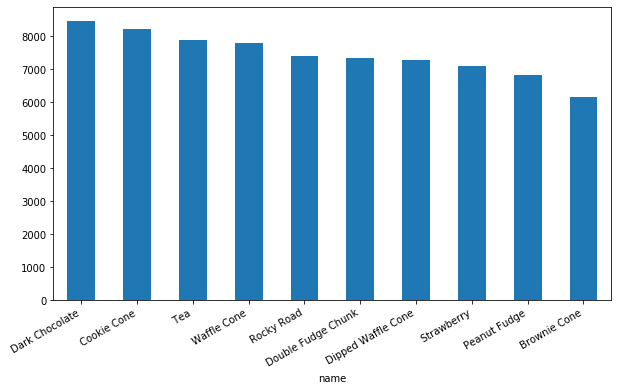

In [57]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()

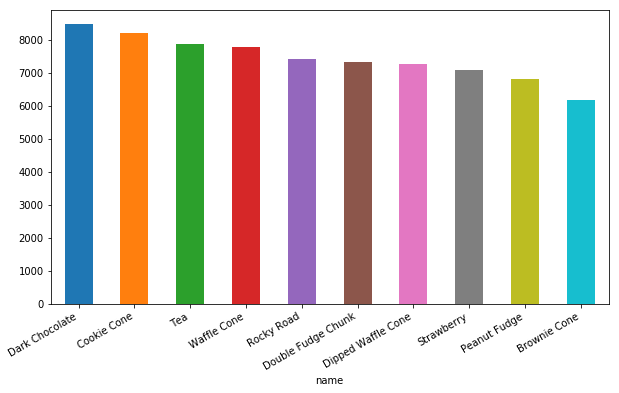

In [20]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()